##Import Library and Load Data

In [298]:
#First off all we imoport all the library that we will use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix


In [299]:
#We create all columns that we need
colums = ['F'+str(i) for i in range(1,11)]
columstot = ['F'+str(i) for i in range(1,11)]
columstot.append('class')
colums2=['F'+str(i) for i in range(1,11)]
colums2.append('mahalanobis')
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']

In [300]:
# function to import data with name and columns= name
def TxtToPandas(colums,name):
  data = pd.read_csv(name, header = None)
  data.columns=colums
  return data

In [301]:
#import data
avilatrain=TxtToPandas(columstot,'avila-tr.txt')
avilatest=TxtToPandas(columstot,'avila-ts.txt')
#Split data between Values X and Y Class
Ytrain=avilatrain.iloc[:,10]
Xtrain=avilatrain.iloc[:, :-1]
Ytest=avilatest.iloc[:,10]
Xtest=avilatest.iloc[:, :-1]

##Data Visalusation Before Cleanning


<BarContainer object of 12 artists>

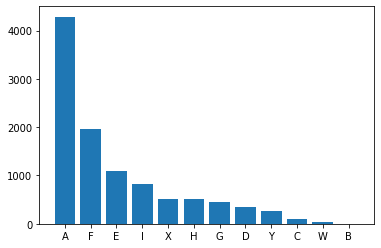

In [302]:
#We observe the repartition off trainning set bewtenn classes.
plt.bar(Ytrain.value_counts().keys(),Ytrain.value_counts().values)

In [303]:

Xtrain.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


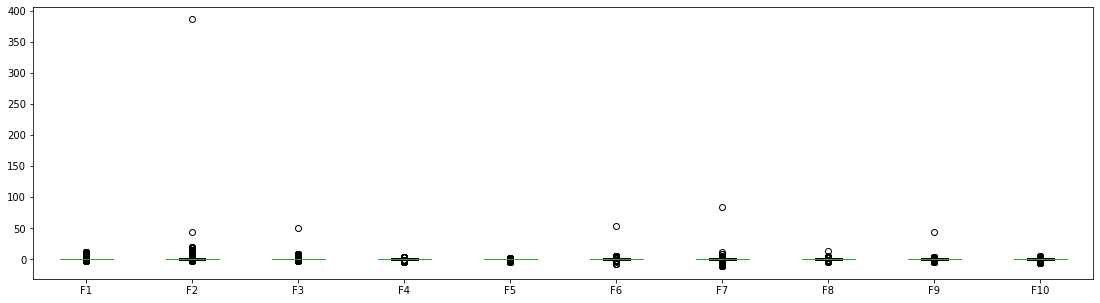

In [304]:
Xtrain.plot(kind='box',figsize=(19,5))
#And we visualize the boxplot of the dataset to delete all the inconsistant values.

##Data Cleanning

In [305]:
#On the graphe above, we can observate a inconsistant values for F2. In this cell we delete all rows this F2<200
#In observing the data set, this row is inconsistant for F6 F7 and F9 too.
avilatrain2 = avilatrain.drop(avilatrain.index[avilatrain['F2'] > 200].tolist()) 
Ytrain2=avilatrain2.iloc[:,10]
Xtrain2=avilatrain2.iloc[:, :-1]

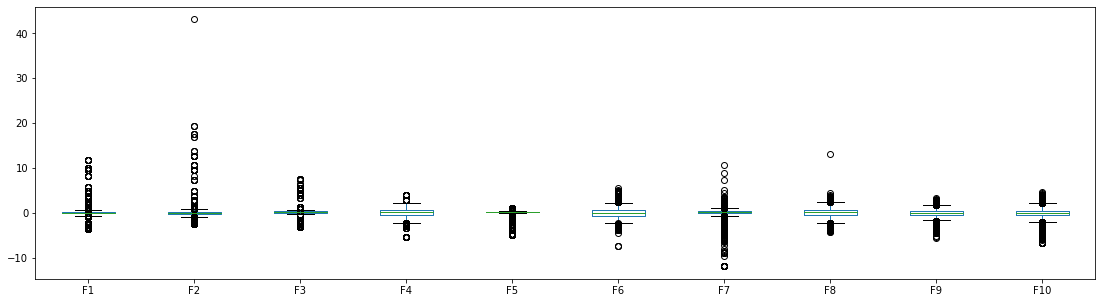

In [306]:
Xtrain2.plot(kind='box',figsize=(19,5))

In [307]:
#In a segond time the plot the DataFrame without the rows who have been deleted above.
#We delete again some inconsistant rows on columns F2 and F8
avilatrain3 = avilatrain2.drop(avilatrain2.index[avilatrain2['F2'] > 30].tolist()) 
avilatrain3 = avilatrain2.drop(avilatrain2.index[avilatrain2['F8'] > 10].tolist()) 
Ytrain3=avilatrain3.iloc[:,10]
Xtrain3=avilatrain3.iloc[:, :-1]

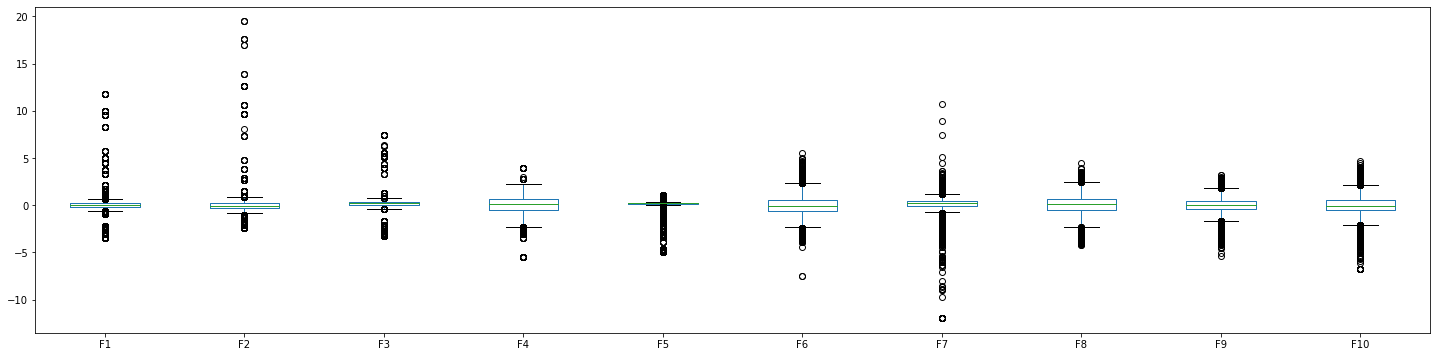

In [308]:
Xtrain3.plot(kind='box',figsize=(25,6))

In [309]:
Xtrain3.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000
mean,0.001188,-0.007535,-0.005012,-0.001882,0.006834,0.009608,-0.001208,0.009035,0.009223,0.001401
std,0.990934,0.953603,1.007133,1.007215,0.991016,0.997023,1.025651,0.995286,0.997380,1.005019
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.423855,-6.719324
25%,-0.128929,-0.261797,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542021,-0.372457,-0.516086
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111735,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654915,0.500624,0.530794
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232


In [310]:
#To determinate all the inconsistant values in a DataFrame, the Mahalanobis distance is frequenty use.
#Here is the function to calculate the mahalanobis distance for each rows on a DataFrame
def mahalanobis(data=None,):
    data_mean = data - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(data_mean, inv_covmat)
    mahal = np.dot(left, data_mean.T)
    return mahal.diagonal()

Text(0.5, 0, 'Mahalanobis Distance')

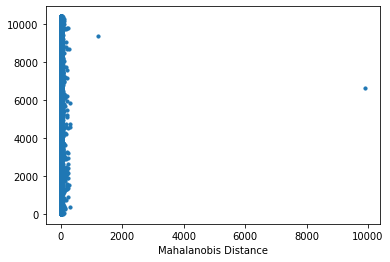

In [311]:
Xtrain['mahalanobis'] = mahalanobis(data=Xtrain)
plt.scatter(Xtrain['mahalanobis'],Xtrain.index,s=10)
plt.xlabel('Mahalanobis Distance')
#We Observe well 3 point with a high Mahalanobis Distance 

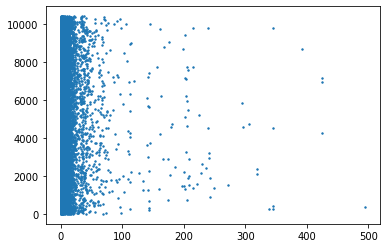

In [312]:
Xtrain3['mahalanobis'] = mahalanobis(data=Xtrain3)
plt.scatter(Xtrain3['mahalanobis'],Xtrain3.index,s=2)

In [313]:
#On décide enfin de suprimer toutes les lignes du dataframe qui ont une 'mahalanobis'>300

In [314]:
avilatrainlast = avilatrain3.drop(Xtrain3.index[Xtrain3['mahalanobis'] > 240].tolist()) 
Ytrainlast=avilatrainlast.iloc[:,10]
Xtrainlast=avilatrainlast.iloc[:, :-1]

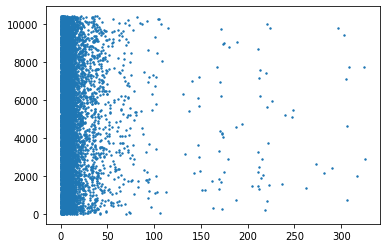

In [315]:
Xtrainlast['mahalanobis'] = mahalanobis(data=Xtrainlast)
plt.scatter(Xtrainlast['mahalanobis'],Xtrainlast.index,s=2)

##Data Visulisation after Cleanning

In [316]:
Xtrainlast.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,mahalanobis
count,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000,10406.000000
mean,0.002475,-0.027098,-0.003638,-0.000834,0.013845,0.012913,0.009134,0.006782,0.014881,0.010151,9.999039
std,0.962941,0.755629,1.005482,1.006214,0.975199,0.992842,0.957494,0.990199,0.988599,0.981227,21.263548
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.049677,-6.719324,0.159422
25%,-0.128929,-0.267686,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542661,-0.341275,-0.511390,2.078699
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111065,0.064084,-0.031505,4.125457
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.653259,0.500624,0.532524,10.260050
max,11.819916,12.655362,7.458681,3.987152,1.066121,5.505495,8.902772,4.510897,3.244594,4.671232,325.556773


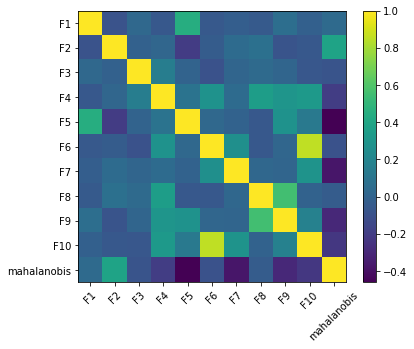

In [317]:
plt.figure(figsize=(6, 5))

plt.imshow(Xtrainlast.corr(), aspect='auto')
plt.xticks(range(Xtrainlast.shape[1]),colums2, rotation=45)
plt.yticks(range(Xtrainlast.shape[1]),colums2)
plt.colorbar()

In [318]:
#On observe une corélation élevé entre les données F6 et F10, nous allons obsesver leurs répartitions sur un graphique

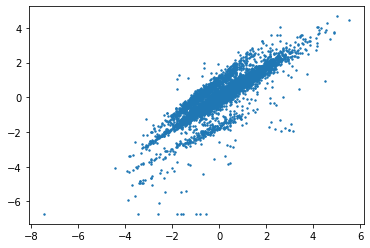

In [319]:
plt.scatter(Xtrainlast['F6'],Xtrainlast['F10'],s=2)

In [320]:
#On peut aussi noter a partir de la matrice de corélation que la colonne F4 possède une corélation non négligeable avec 4 autres colonnes. Nous allons donc observer le PCA de cette base de données pour en déduire les colonnes les plus intéressantes pour la prédictions comme vu dans le cours de Machine Learning

In [321]:
del Xtrainlast['mahalanobis']

In [322]:
#dans le readme il est indiqué que la bdd est déja scale avec la Z-normalized method. il n'est donc pas nécessaire de le scale a nouveau avec la libraire sklearn

Text(0.5, 0, 'Columns')

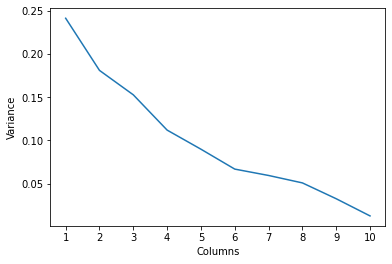

In [323]:
pca = PCA()
principalComponents = pca.fit_transform(Xtrainlast)
plt.plot(pca.explained_variance_ratio_)
plt.xticks(np.arange(0, 10, step=1),range(1,11))
plt.ylabel('Variance')
plt.xlabel('Columns')

In [324]:
#On initialise les 4 dictionnaires suivants pour stocker les données obtenus 
accuracy_stock={}
precision_stock={}
recall_stock={}
f1_score_stock={}

In [325]:
#logistical regression
log_reg=LogisticRegression()
log_reg.fit(Xtrainlast, Ytrainlast)
pred=log_reg.predict(Xtest)
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Ytest,pred, average='macro')
print(confusion_matrix(Ytest,pred))
accuracy
accuracy_stock["log_reg"]=accuracy
precision_stock["log_reg"]=precision
recall_stock["log_reg"]=recall
f1_score_stock["log_reg"]=f1_score

[[4001    0    1    3   64  137   23   25   20    0    7    5]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [  63    0    0    0   14   16    4    2    4    0    0    0]
 [ 287    0    0    0   38   10    0   15    1    0    2    0]
 [ 642    0    0    0  292   55    3   27   14    0   57    5]
 [1735    0    0    1   16  165   10   12   17    0    0    6]
 [ 326    0    0    0   14   34   14   55    0    0    4    0]
 [ 277    0    0    0   48   46    1  132   14    0    1    1]
 [  40    0    0    0    5   14    0    8  722    0   24   19]
 [  30    0    0    0   10    0    0    0    0    3    2    0]
 [  48    0    0    0   37    3    0    0   24    5  369   36]
 [  31    0    0    0    3    1    0    0   33    0   29  170]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [326]:
#Logistical Regression PCA
log_reg_pca=LogisticRegression()
log_reg_pca.fit(principalComponents, Ytrainlast)
pred=log_reg_pca.predict(pca.transform(Xtest))
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Ytest,pred, average='macro')
print(confusion_matrix(Ytest,pred))
accuracy_stock["log_reg_pca"]=accuracy
precision_stock["log_reg_pca"]=precision
recall_stock["log_reg_pca"]=recall
f1_score_stock["log_reg_pca"]=f1_score

[[3999    0    0    3   65  138   24   25   20    0    7    5]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [  63    0    0    0   14   16    4    2    4    0    0    0]
 [ 287    0    0    0   38   10    0   15    1    0    2    0]
 [ 642    0    0    0  292   55    3   27   14    0   57    5]
 [1734    0    0    1   16  167   10   12   16    0    0    6]
 [ 325    0    0    0   14   35   14   55    0    0    4    0]
 [ 276    0    0    0   48   47    1  132   14    0    1    1]
 [  40    0    0    0    5   15    0    8  721    0   24   19]
 [  30    0    0    0   10    0    0    0    0    3    2    0]
 [  48    0    0    0   37    3    0    0   24    5  369   36]
 [  31    0    0    0    3    1    0    0   33    0   29  170]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [327]:
n=[1,3,5,7]
accuracy=0
matconf=[]
besti=0
for i in n:

  knn = KNeighborsClassifier(i)
  knn.fit(Xtrainlast,Ytrainlast)
  pred= knn.predict(Xtest)
  accuracyi=accuracy_score(Ytest,pred)
  precisioni, recalli, f1_scorei, _ = precision_recall_fscore_support(Ytest,pred, average='macro')
  matconfi=confusion_matrix(Ytest,pred)
  if accuracy< accuracyi:
    accuracy,besti,precision, recall, f1_score,matconf=accuracyi,i,precisioni, recalli, f1_scorei,matconfi
accuracy_stock["knn"]=accuracy
precision_stock["knn"]=precision
recall_stock["knn"]=recall
f1_score_stock["knn"]=f1_score
print(matconf)

[[3686    0    2   18   49  446   44   33    2    0    3    3]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [  40    0   41    2    8   12    0    0    0    0    0    0]
 [  84    0    6  195   24   36    1    5    1    0    1    0]
 [ 215    0   11   30  712   65   11   38    1    0   10    2]
 [ 586    0    2    8   16 1305   32   11    2    0    0    0]
 [ 131    0    0    0   22   52  235    6    0    0    1    0]
 [ 146    0    5    3   41   41    8  275    0    0    1    0]
 [  26    0    0    2    4    3    1    1  788    0    1    6]
 [  12    0    0    0    3    1    0    0    0   27    2    0]
 [  36    0    0    3   15    2    0    5    3    0  435   23]
 [  25    0    0    4    8    1    0    0   18    0   10  201]]


In [328]:
#Random Forest
rand_for=RandomForestClassifier()
rand_for.fit(Xtrainlast,Ytrainlast)
pred=rand_for.predict(Xtest)
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Ytest,pred, average='macro')
print(confusion_matrix(Ytest,pred))
accuracy
accuracy_stock["rand_for"]=accuracy
precision_stock["rand_for"]=precision
recall_stock["rand_for"]=recall
f1_score_stock["rand_for"]=f1_score

[[4261    0    0    0    5   11    2    5    2    0    0    0]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [   6    0   96    0    1    0    0    0    0    0    0    0]
 [   0    0    0  346    7    0    0    0    0    0    0    0]
 [  21    0    0    0 1071    0    0    0    0    0    3    0]
 [  39    0    0    0    4 1916    2    1    0    0    0    0]
 [  12    0    0    0    1    1  433    0    0    0    0    0]
 [  14    0    3    0    1    0    0  502    0    0    0    0]
 [   4    0    0    0    0    0    0    0  828    0    0    0]
 [   0    0    0    0    0    0    0    0    0   45    0    0]
 [   7    0    0    0    6    0    0    0    0    0  509    0]
 [   0    0    0    0    1    0    0    0    0    0    0  266]]


In [329]:
#Random Forest PCA
rand_for_pca=RandomForestClassifier()
rand_for_pca.fit(principalComponents, Ytrainlast)
pred=rand_for_pca.predict(pca.transform(Xtest))
accuracy=accuracy_score(Ytest,pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Ytest,pred, average='macro')
print(confusion_matrix(Ytest,pred))
accuracy
accuracy_stock["rand_for_pca"]=accuracy
precision_stock["rand_for_pca"]=precision
recall_stock["rand_for_pca"]=recall
f1_score_stock["rand_for_pca"]=f1_score

[[3913    0    1    5   29  261   34   24   11    0    6    2]
 [   0    4    0    0    0    1    0    0    0    0    0    0]
 [  40    0   22    1   17   14    0    4    5    0    0    0]
 [  93    0    0  172   52   30    1    2    0    0    3    0]
 [ 197    0    0    9  777   61    8   20    2    0   11   10]
 [ 697    0    0    0   16 1198   34    6    6    0    0    5]
 [ 119    0    0    0   25   36  256    8    0    0    3    0]
 [ 147    0    1    0   45   27   10  286    3    0    1    0]
 [  34    0    0    0    3    4    0    0  791    0    0    0]
 [  14    0    0    0    1    0    1    0    0   27    2    0]
 [  35    0    0    0   23    0    0    4    3    0  436   21]
 [  26    0    0    1   14    0    0    0   16    0   14  196]]


In [330]:
print('Model         |    Accuracy\t|\tPrecision\t|\t recall \t|\tf1_score\t|')
for i in accuracy_stock.keys(): 
  print(i,end='')
  for a in range(len(i),14):
    print(' ', end='')
  print('|    '+str(round(accuracy_stock[i],6))+'\t',end='')
  print('|\t'+str(round(precision_stock[i],6))+'\t',end='')
  print('|\t'+str(round(recall_stock[i],7))+'\t',end='')
  print('|\t'+str(round(f1_score_stock[i],6))+'\t|')

Model         |    Accuracy	|	Precision	|	 recall 	|	f1_score	|
log_reg       |    0.56271	|	0.485319	|	0.4039576	|	0.410453	|
log_reg_pca   |    0.562614	|	0.484923	|	0.4039035	|	0.410516	|
knn           |    0.757402	|	0.811962	|	0.692806	|	0.74124	|
rand_for      |    0.984766	|	0.990578	|	0.980135	|	0.985275	|
rand_for_pca  |    0.773977	|	0.860667	|	0.6647306	|	0.729154	|
